In [ ]:
import mne
from mne.preprocessing import ICA
import numpy as np

In [2]:
sample_raw = mne.io.read_raw_bti(
    pdf_fname='/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_RAW/BCOM_01/MEG/BCOM_01/BCom/04%15%19@03_49/2/c,rfDC',
    config_fname='/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_RAW/BCOM_01/MEG/BCOM_01/BCom/04%15%19@03_49/2/config',
    head_shape_fname='/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_RAW/BCOM_01/MEG/BCOM_01/BCom/04%15%19@03_49/2/hs_file',
    rename_channels=True,
    sort_by_ch_name=True,
    ecg_ch="ECG",
    eog_ch=("EOGv", "EOGh"),    
    preload=True,
    )

Reading 4D PDF file /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_RAW/BCOM_01/MEG/BCOM_01/BCom/04%15%19@03_49/2/c,rfDC...
Creating Neuromag info structure ...
... Setting channel info structure.
... putting coil transforms in Neuromag coordinates
... Reading digitization points from /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_RAW/BCOM_01/MEG/BCOM_01/BCom/04%15%19@03_49/2/hs_file
Currently direct inclusion of 4D weight tables is not supported. For critical use cases please take into account the MNE command "mne_create_comp_data" to include weights as printed out by the 4D "print_table" routine.
Reading 0 ... 1541987  =      0.000 ...   757.916 secs...


In [3]:
empty_room_recording = mne.io.read_raw_bti(
    pdf_fname='/Volumes/BCOM/BCOM/DATA_RAW/BCOM_01/MEG/BCOM_01/emp_sup_v1/04%15%19@03_06/2/c,rfDC',
    config_fname='/Volumes/BCOM/BCOM/DATA_RAW/BCOM_01/MEG/BCOM_01/emp_sup_v1/04%15%19@03_06/2/config',
    head_shape_fname=None,
    rename_channels=True,
    sort_by_ch_name=True,
    ecg_ch="ECG",
    eog_ch=("EOGv", "EOGh"),    
    preload=True,
    )

Reading 4D PDF file /Volumes/BCOM/BCOM/DATA_RAW/BCOM_01/MEG/BCOM_01/emp_sup_v1/04%15%19@03_06/2/c,rfDC...
Creating Neuromag info structure ...
... Setting channel info structure.
... putting coil transforms in Neuromag coordinates
... no headshape file supplied, doing nothing.
Currently direct inclusion of 4D weight tables is not supported. For critical use cases please take into account the MNE command "mne_create_comp_data" to include weights as printed out by the 4D "print_table" routine.
Reading 0 ... 366211  =      0.000 ...   180.000 secs...


In [5]:
# filtering params, from MNE best practices
lowpass_filter = 150.0 #to get freq up to 150
highpass_filter = 0.5
sample_rate = 500


# ICA setup
ica_method = 'fastica'
n_components = 0.97
decim = 3
random_state = 23

In [6]:
# code from Remy
def get_flats(raw, flat_criteria, duration, id, start):
    events_tmp = mne.make_fixed_length_events(raw, duration=duration, id=id, start=start)
    epochs_tmp = mne.Epochs(raw, events=events_tmp, event_id=1, flat=flat_criteria, verbose=False)
    epochs_tmp.load_data()
    
    flat_channels = []
    
    if epochs_tmp.drop_log_stats()>0:
        flat_channels=list(set([ch for chs in epochs_tmp.drop_log for ch in chs]))
    del epochs_tmp

    return flat_channels

In [7]:

noisy_channels_subject = mne.preprocessing.find_bad_channels_lof(sample_raw.copy().pick("meg").filter(1,100)) # the idea here is to remove slow drift to keep channels that might be eroneously removed
noisy_channels_empty_room = mne.preprocessing.find_bad_channels_lof(empty_room_recording.copy().pick("meg").filter(1,100))
# -------- Find flat channels

flat_criteria= dict(mag=1e-13)
duration=3
id=1
start=2

flat_channels_subject = get_flats(
    raw=sample_raw, 
    flat_criteria=flat_criteria,
    duration=duration,
    id=id,
    start=start
)

flat_channels_empty_room = get_flats(
    raw=empty_room_recording,
    flat_criteria=flat_criteria,
    duration=duration,
    id=id,
    start=start
)
     
bad_channels_subject = noisy_channels_subject + flat_channels_subject
bad_channels_empty_room = noisy_channels_empty_room + flat_channels_empty_room

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6715 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.8s


LOF: Detected bad channel(s): ['MEG 230']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6715 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.8s


LOF: Detected bad channel(s): ['MEG 144']
Using data from preloaded Raw for 251 events and 1425 original time points ...
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173']
    Rejecting flat epoch based on MAG : ['MEG 059', 'MEG 173

/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_53935/2212337708.py:5: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs_tmp.load_data()
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_53935/2212337708.py:5: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs_tmp.load_data()


In [8]:
print(bad_channels_subject)
print(bad_channels_empty_room)

['MEG 230', 'MEG 059', 'MEG 173']
['MEG 144', 'MEG 059', 'MEG 173']


In [9]:
sample_raw.info['bads'] = bad_channels_subject
empty_room_recording.info['bads'] = bad_channels_empty_room

In [29]:
empty_room_recording.info['bads']

['MEG 144', 'MEG 173', 'MEG 059']

Effective window size : 1.007 (s)


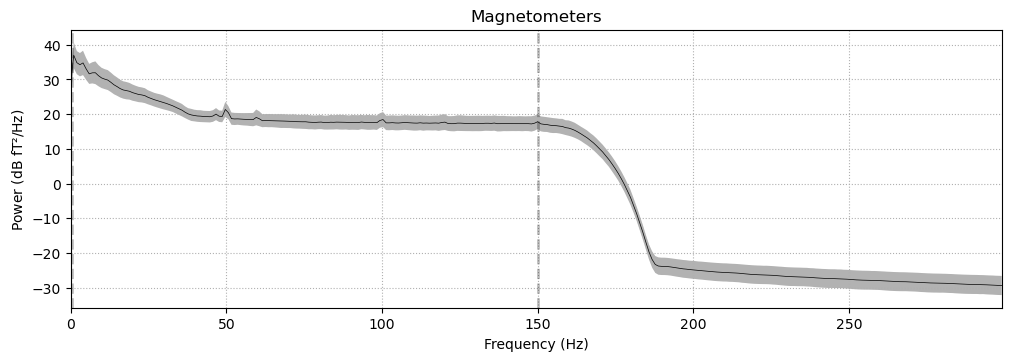

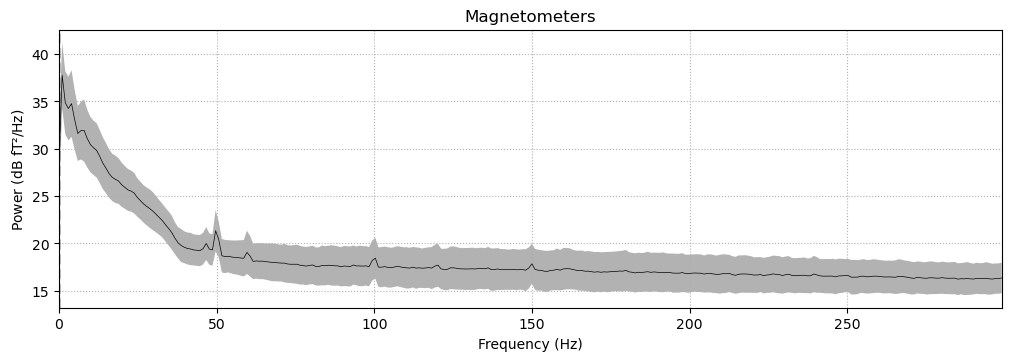

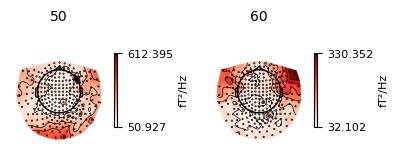

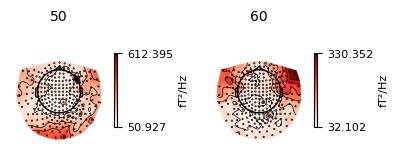

In [ ]:
# question here, should there be a notch filter in the pipeline? seems to be environmental noise at 50 and 60Hz. 
# might be fine because we can do baseline normalization in the TF domain to iron out any noise at these frequencies
sample_raw.compute_psd(tmax = np.inf, fmax=300.0).plot_topomap(
    {"50": (49, 51),
     "60": (59, 61)}
)

In [19]:
filtered_raw = sample_raw.copy().filter(l_freq=highpass_filter, h_freq=lowpass_filter)
filtered_empty_room = sample_raw.copy().filter(l_freq=highpass_filter, h_freq=lowpass_filter)
# filtered_raw.compute_psd(tmax=np.inf, fmax=150.0).plot(average=True, amplitude=False, exclude="bads")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.2s


In [22]:
events = mne.find_events(filtered_raw, shortest_event=1)

Trigger channel STI 014 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1053 events found on stim channel STI 014
Event IDs: [  2   4  12  14  16  22  24  26  32  34  36  42  44  46  52  54  56  62
  64  66 112 114 116 122 124 126 132 134 136 142 144 146 152 154 156 162
 164 166 512 514 516 524 526 528 534 536 538 544 546 548 554 556 558 564
 566 568 574 576 578 624 626 628 634 636 638 644 646 648 654 656 658 664
 666 668 674 676 678]


In [24]:
resampled_raw = filtered_raw.resample(sfreq=500, events=events)
resampled_empty_room = filtered_empty_room.resample(sfreq=500)

Sampling frequency of the instance is already 500.0, returning unmodified.
Sampling frequency of the instance is already 500.0, returning unmodified.


In [26]:
ica_subject = ICA(n_components=n_components, # on cluster use None! to get maximum explanation 
          method=ica_method,
          random_state=random_state,
        )

In [27]:
# highpass filter at 1 so that the drift doesnt take all the variance - see MNE docs
raw_ica = resampled_raw.copy().filter(1,None)
reject = dict(mag=5e-12)
ica_subject.fit(raw_ica, picks='meg', decim=decim, reject=reject) 

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.0s


Fitting ICA to data using 245 channels (please be patient, this may take a while)
    Rejecting  epoch based on MAG : ['MEG 071', 'MEG 089', 'MEG 091', 'MEG 113', 'MEG 119', 'MEG 128', 'MEG 129', 'MEG 146', 'MEG 150', 'MEG 155', 'MEG 171', 'MEG 175', 'MEG 179', 'MEG 191', 'MEG 227', 'MEG 234', 'MEG 247', 'MEG 248']
Artifact detected in [0, 334]
    Rejecting  epoch based on MAG : ['MEG 248']
Artifact detected in [2338, 2672]
    Rejecting  epoch based on MAG : ['MEG 229']
Artifact detected in [21710, 22044]
    Rejecting  epoch based on MAG : ['MEG 212', 'MEG 213', 'MEG 227', 'MEG 228', 'MEG 229', 'MEG 231', 'MEG 247', 'MEG 248']
Artifact detected in [34736, 35070]
    Rejecting  epoch based on MAG : ['MEG 145', 'MEG 146', 'MEG 212', 'MEG 227', 'MEG 228', 'MEG 229', 'MEG 246', 'MEG 247', 'MEG 248']
Artifact detected in [41082, 41416]
    Rejecting  epoch based on MAG : ['MEG 179', 'MEG 212', 'MEG 213', 'MEG 227', 'MEG 228', 'MEG 229', 'MEG 231', 'MEG 246', 'MEG 247', 'MEG 248']
Artifac

Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,110 iterations on raw data (118904 samples)
ICA components,73
Available PCA components,245
Channel types,mag
ICA components marked for exclusion,—


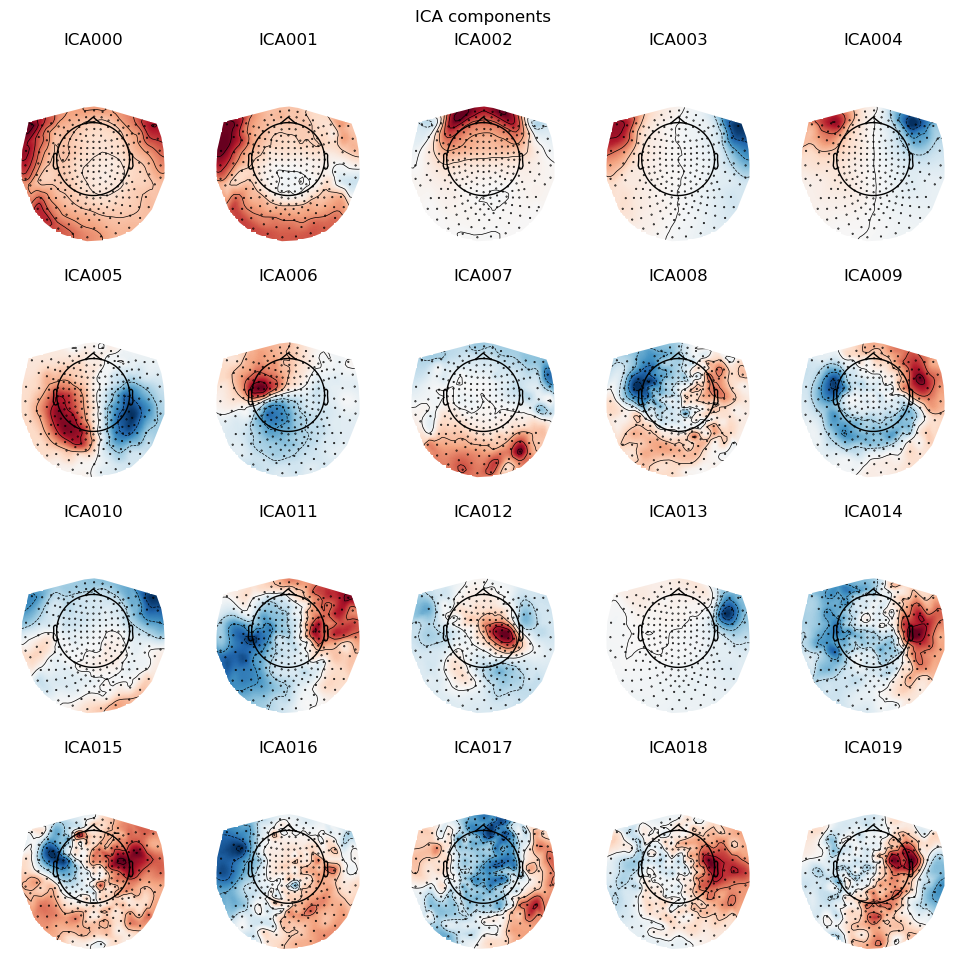

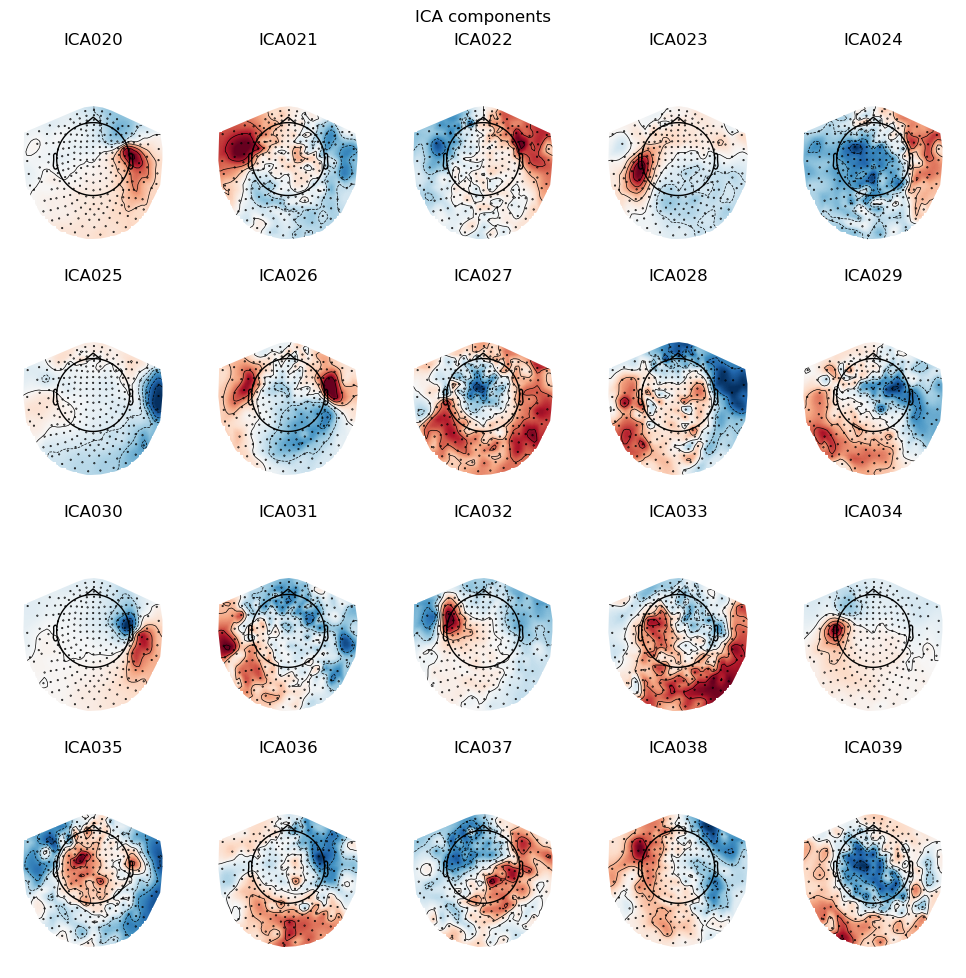

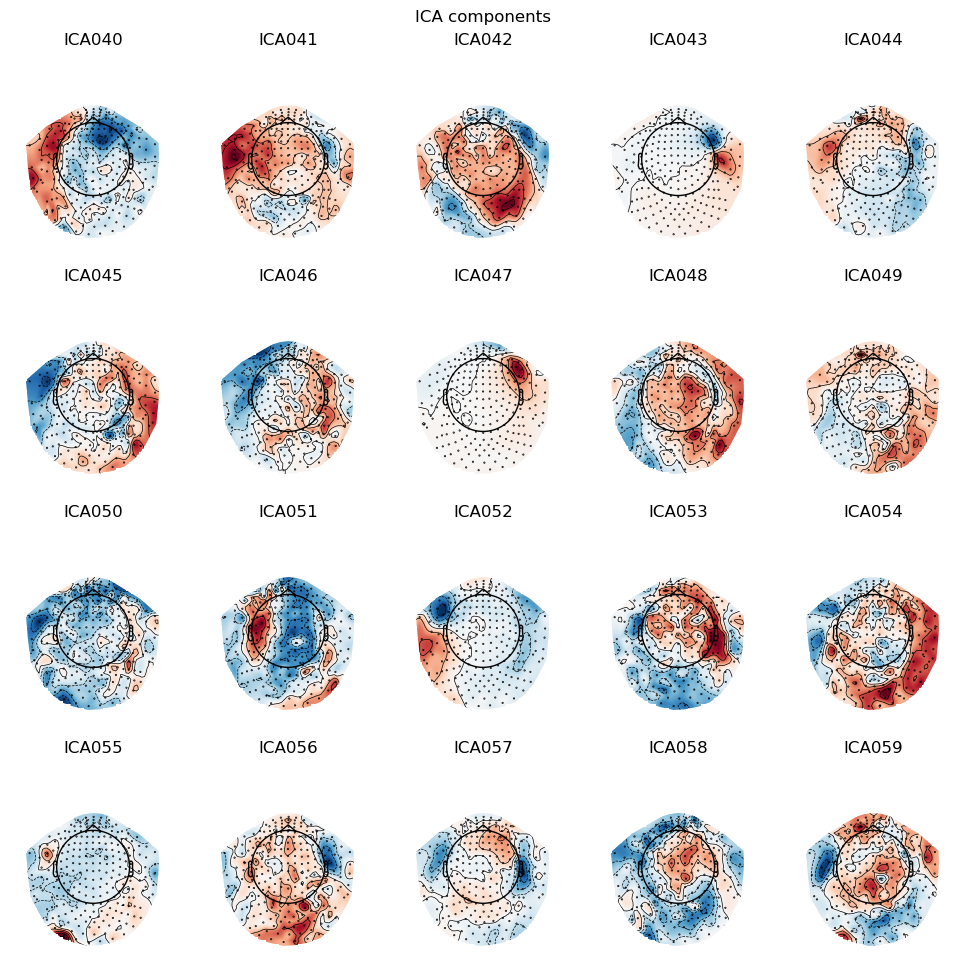

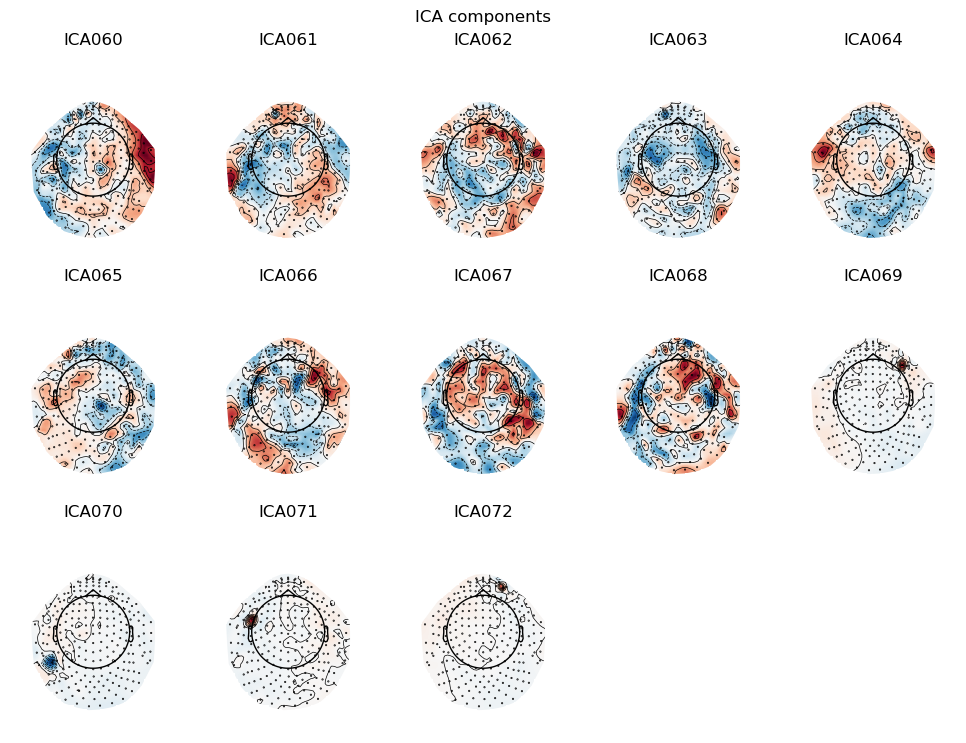

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x731.5 with 13 Axes>]

In [28]:
ica_subject.plot_components()

In [29]:
ica_subject.plot_sources(resampled_raw)

Creating RawArray with float64 data, n_channels=76, n_times=378958
    Range : 0 ... 378957 =      0.000 ...   757.914 secs
Ready.
Using qt as 2D backend.
Using pyopengl with version 3.1.6


2025-04-16 16:39:08.611 python[53935:1500610] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-16 16:39:08.611 python[53935:1500610] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [31]:
ica_subject.apply(resampled_raw)

Applying ICA to Raw instance
    Transforming to ICA space (73 components)
    Zeroing out 5 ICA components
    Projecting back using 245 PCA components


<RawBTi | c,rfDC, 284 x 378958 (757.9 s), ~821.7 MB, data loaded>

In [32]:
ica_subject.apply(resampled_empty_room)

Applying ICA to Raw instance
    Transforming to ICA space (73 components)
    Zeroing out 5 ICA components
    Projecting back using 245 PCA components


<RawBTi | c,rfDC, 284 x 378958 (757.9 s), ~821.7 MB, data loaded>

In [ ]:
### NB! SAVE THE SOLUTION!
# ica_subject.save("Filename")

In [33]:
print(bad_channels_subject)
print(bad_channels_empty_room)

['MEG 230', 'MEG 059', 'MEG 173']
['MEG 144', 'MEG 059', 'MEG 173']


In [34]:
bads_union = list(set(bad_channels_subject).union(set(bad_channels_empty_room))) # to be created, maybe save this as well.

In [35]:
bads_union

['MEG 059', 'MEG 230', 'MEG 144', 'MEG 173']

In [ ]:
resampled_raw.info['bads'] = bads_union
empty_room_recording.info['bads'] = bads_union

# bad_loc_channel = "MEG 173"

# resampled_raw.info['bads'].remove(bad_loc_channel)
# empty_room_recording.info['bads'].remove(bad_loc_channel)


In [ ]:
# save interpolation for later 
# resampled_raw.interpolate_bads()
# empty_room_recording.interpolate_bads(origin=(0.0, 0.0, 0.0))

Setting channel interpolation method to {'meg': 'MNE'}.
Setting channel interpolation method to {'meg': 'MNE'}.


/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_52653/3335031035.py:1: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  resampled_raw.interpolate_bads()
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_52653/3335031035.py:2: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  empty_room_recording.interpolate_bads(origin=(0.0, 0.0, 0.0))


<RawBTi | c,rfDC, 280 x 90000 (180.0 s), ~192.5 MB, data loaded>